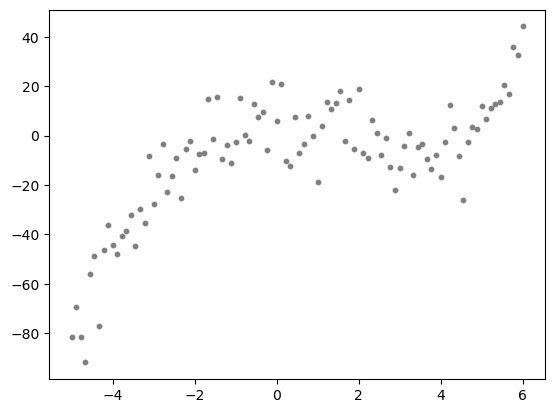

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,6,100)
np.random.shuffle(x)

y = 5 + x - 2*x**2 + 1e-1*x**3 + 1e-2*x**5
#noise 섞은 것
y = y + 1e1*np.random.randn (100)

x = x.reshape(-1,1)
y = y.reshape(-1,1)

plt.figure()
plt.scatter(x,y,s = 10, c = 'gray')

C:\Users\user\AppData\Local\Temp\ipykernel_33696\546481405.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Text(0.5, 0, 'polynomial')

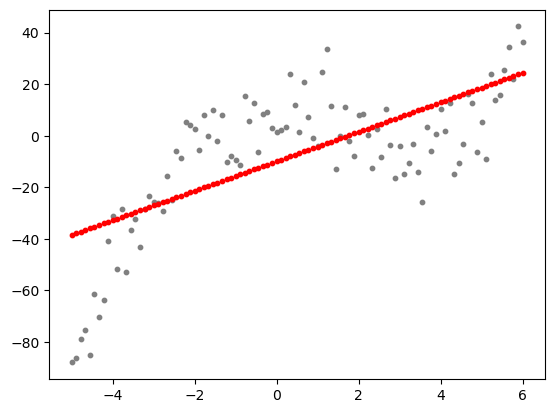

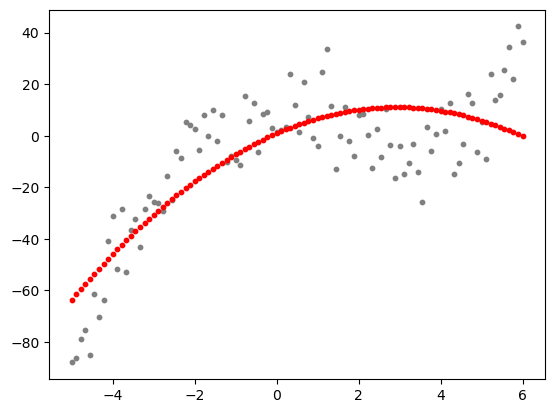

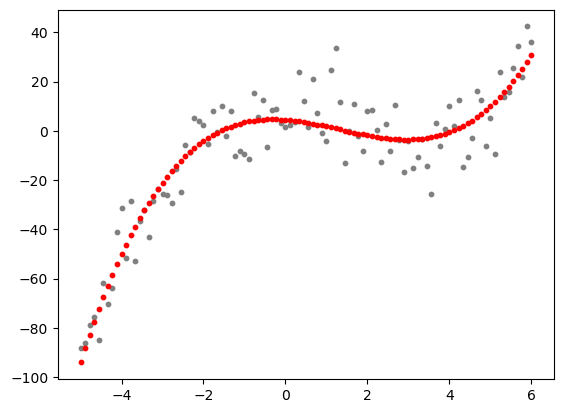

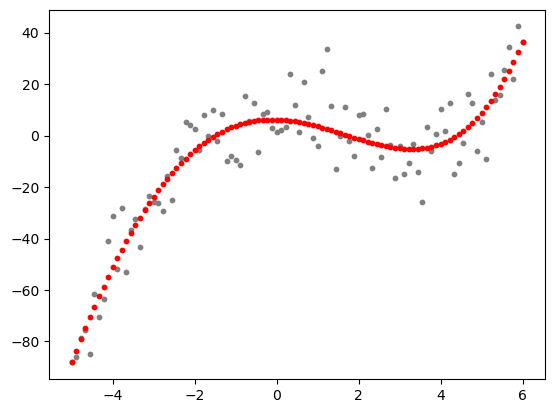

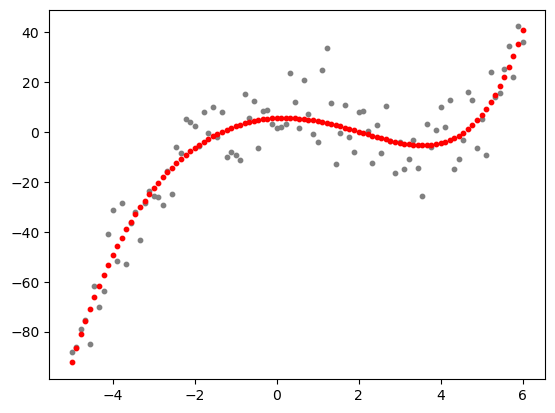

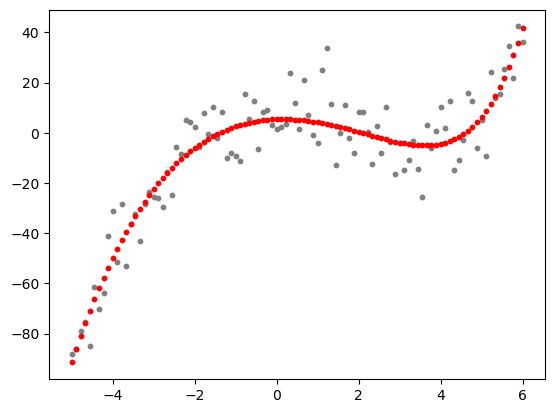

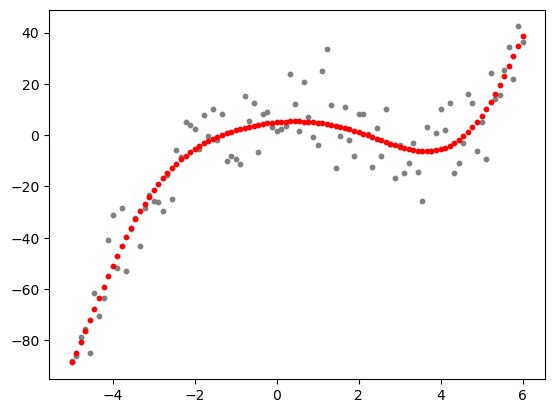

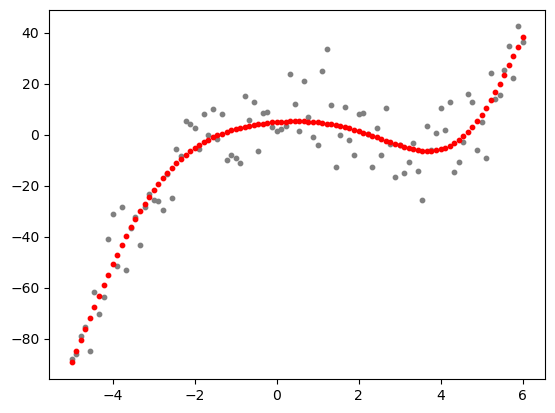

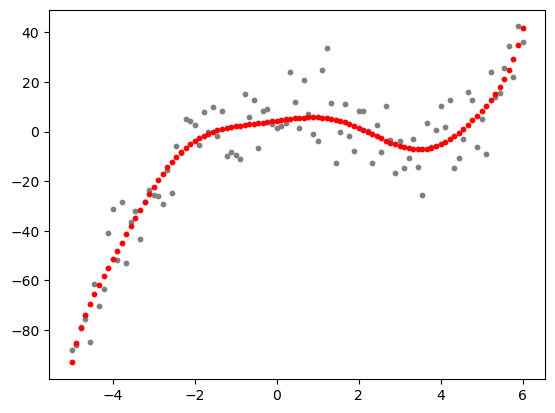

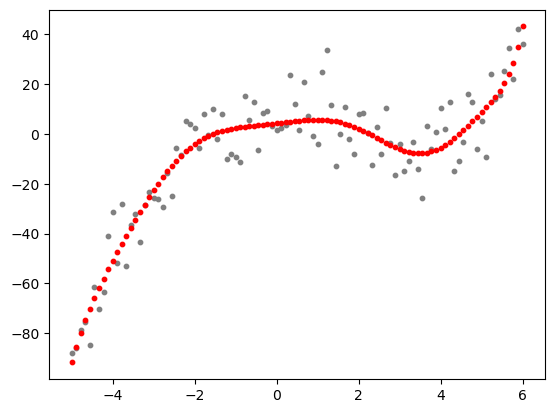

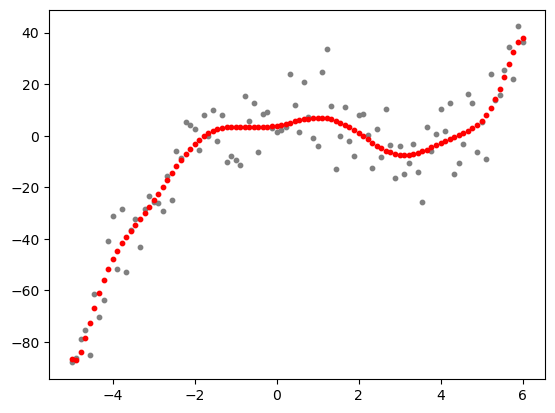

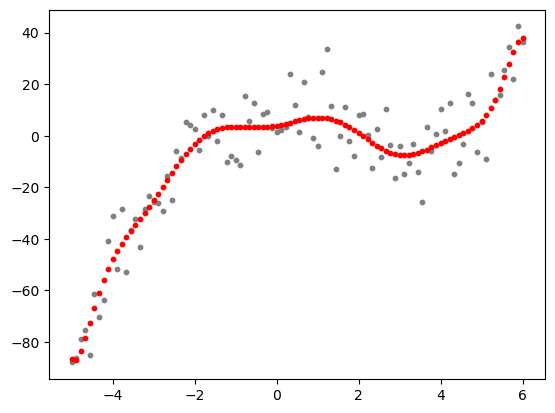

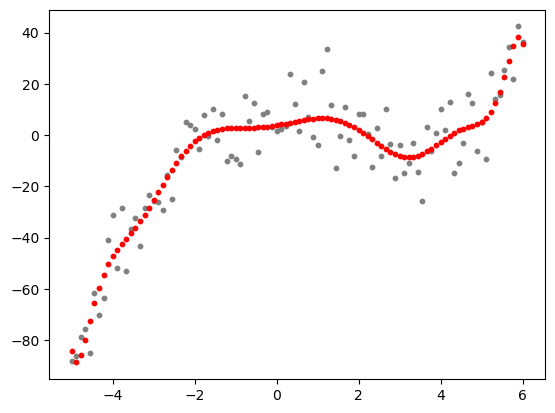

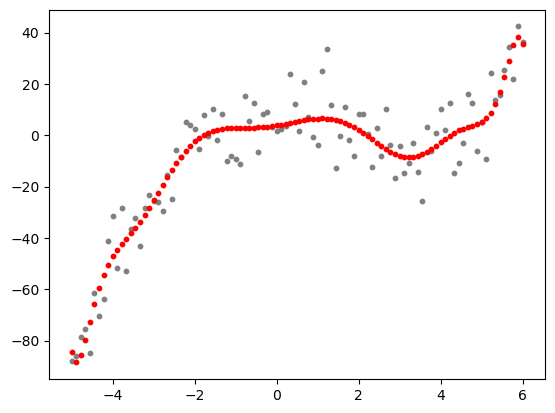

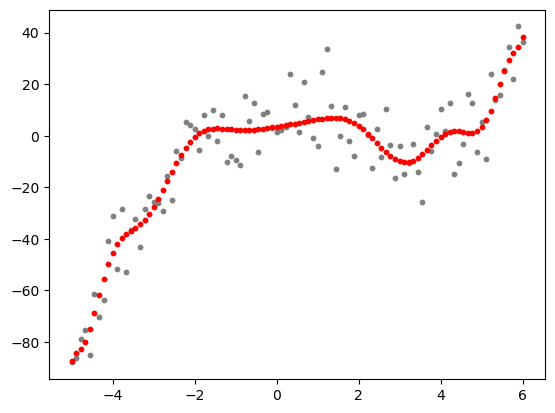

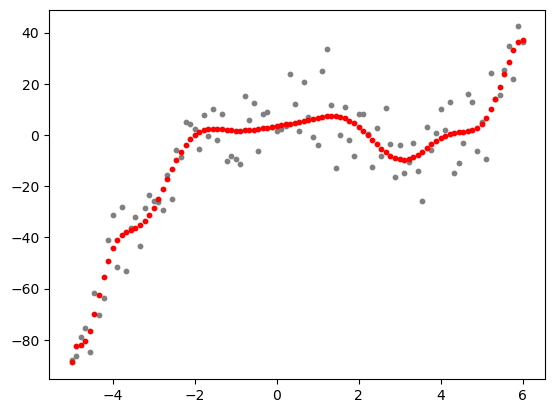

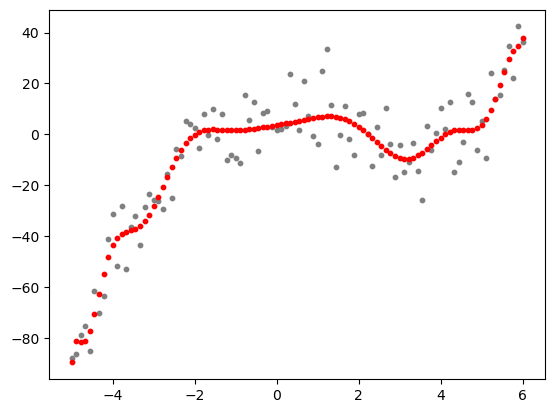

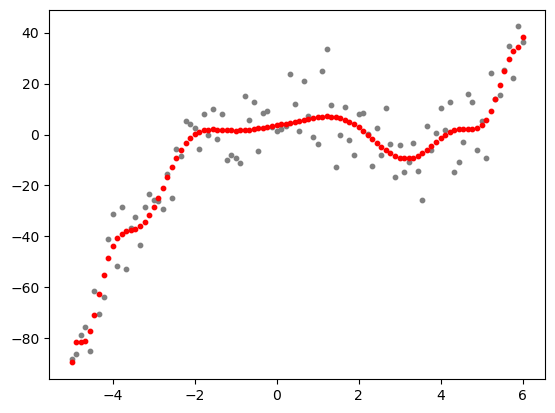

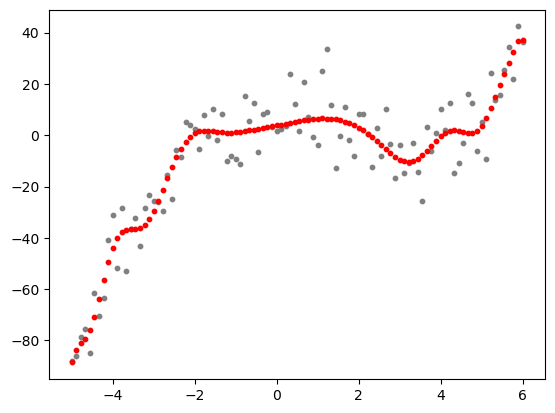

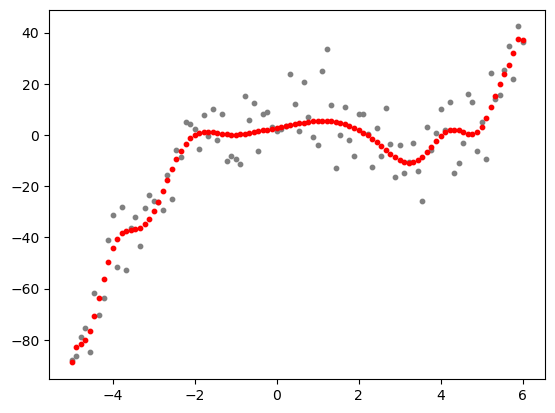

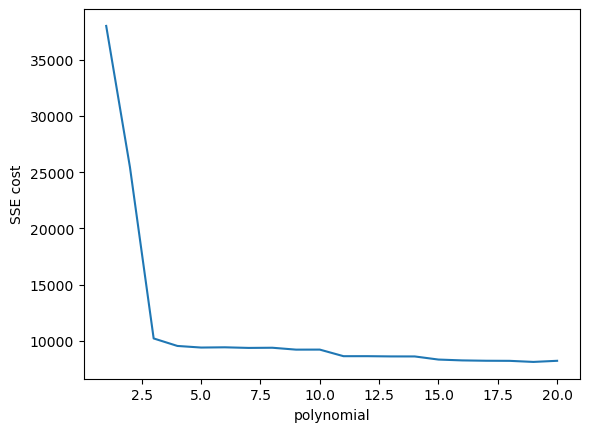

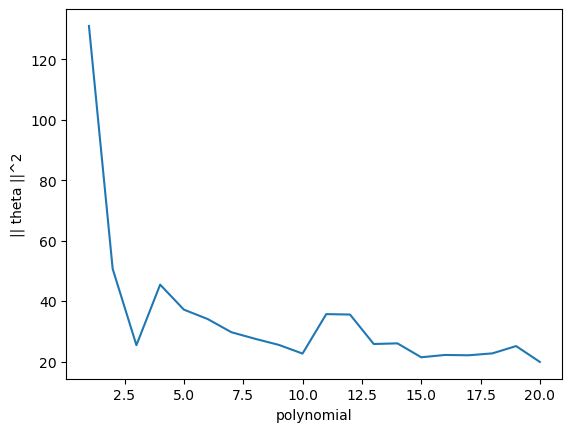

In [6]:
# 질문 !! 왜 sse 그래프는 변화가 없지?

N,D = x.shape

alpha = 1e1

sse = np.zeros(100)
sse[:] = np.nan

theta_norm2 = np.zeros(100)
theta_norm2[:] = np.nan

for D in range(1, 21):
    X = np.ones((N,1))
    for d in range(1, D + 1):
        X = np.hstack([X, x**d])

    theta = np.linalg.inv(X.T.dot(X) + alpha*np.identity(D + 1)).dot(X.T).dot(y)
    y_pred = X.dot(theta)
    
    sse[D] = np.sum((y - y_pred)**2)     
    theta_norm2[D] = np.sum(theta**2)
    
    plt.figure()
    plt.scatter(x,y,s = 10, c = 'gray')
    plt.scatter(x,y_pred,s = 10, c = 'red')
    
plt.figure()
plt.plot(sse)
plt.xlabel('polynomial')
plt.ylabel('SSE cost')

plt.figure()
plt.plot(theta_norm2)
plt.ylabel('|| theta ||^2')
plt.xlabel('polynomial')

C:\Users\user\AppData\Local\Temp\ipykernel_33696\4113051344.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Text(0.5, 0, 'polynomial')

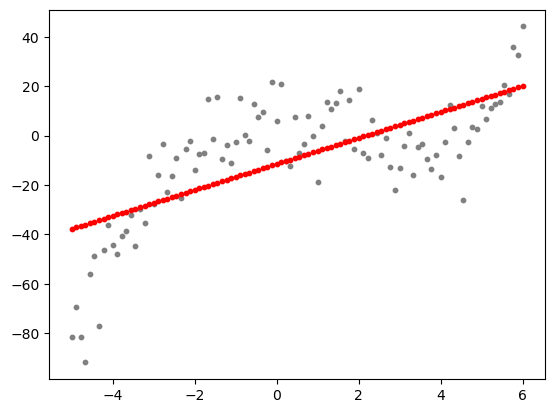

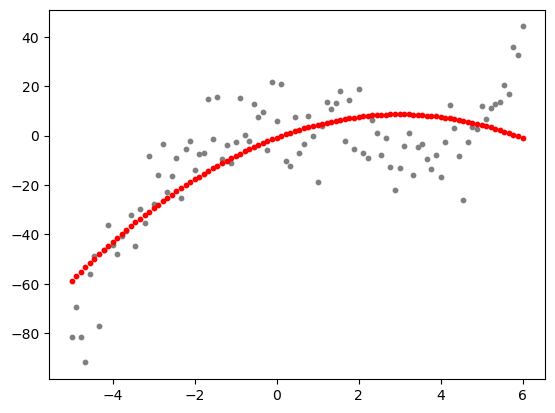

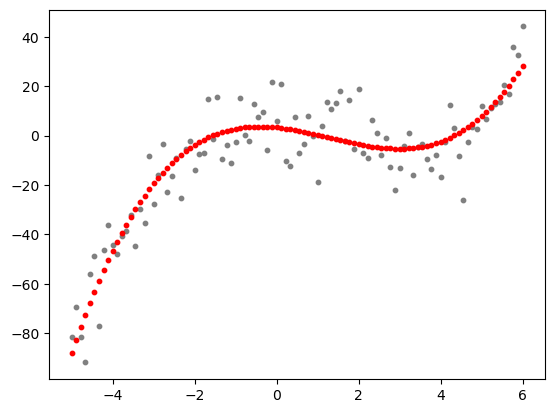

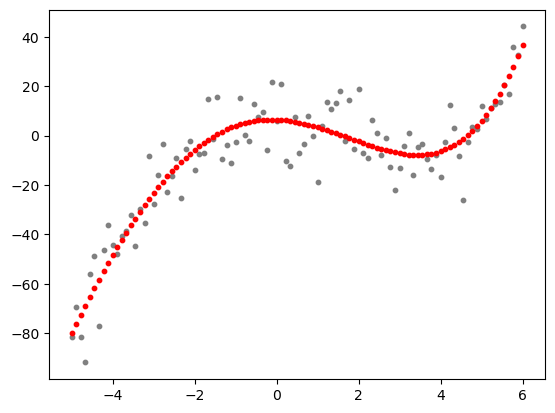

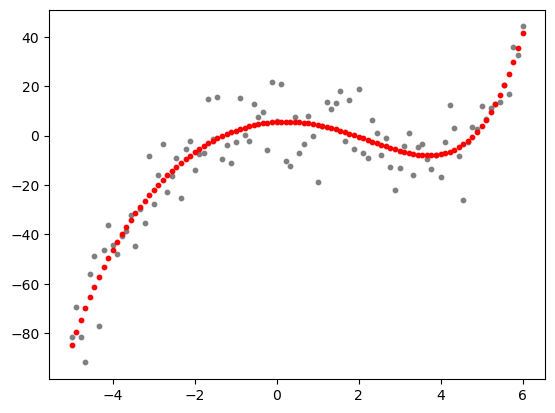

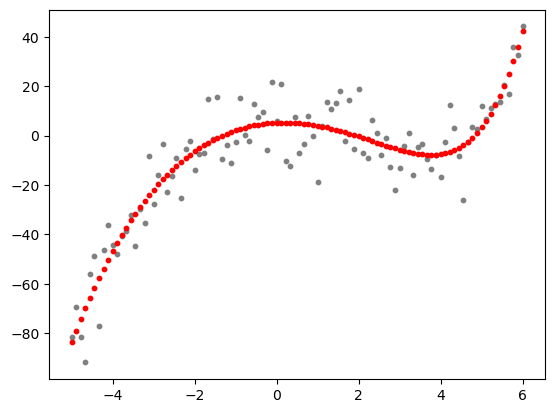

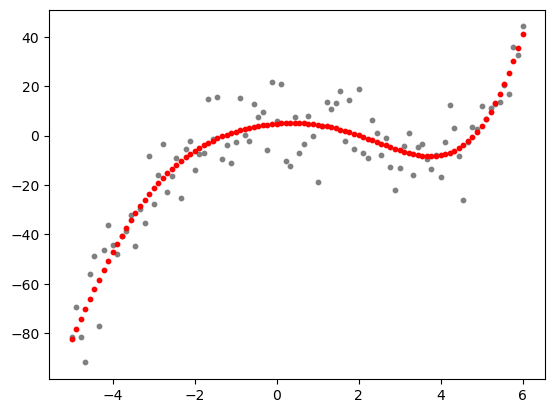

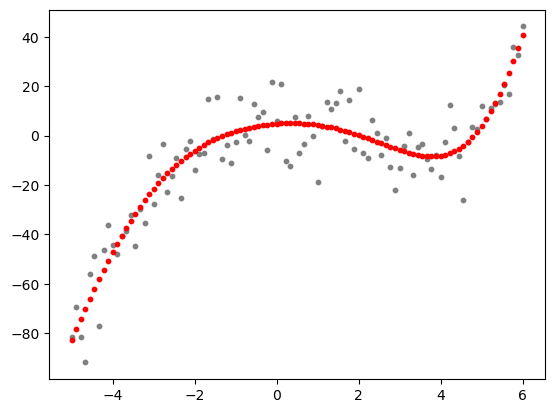

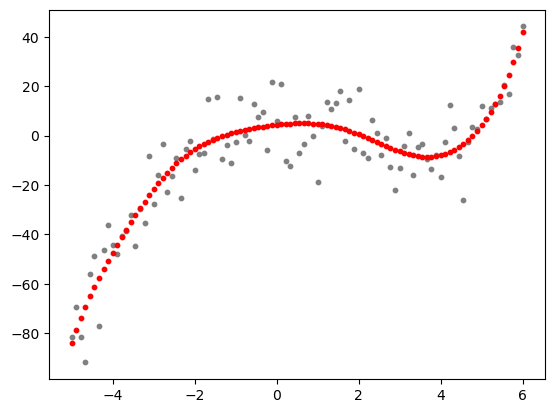

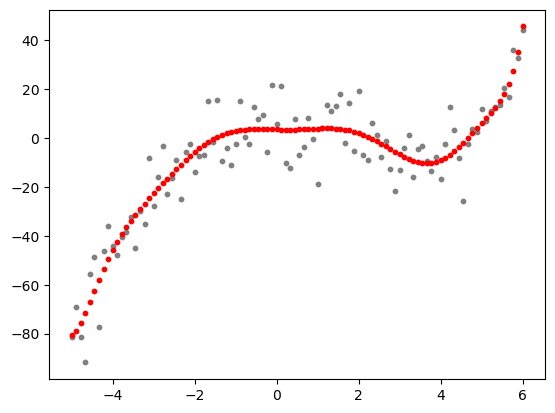

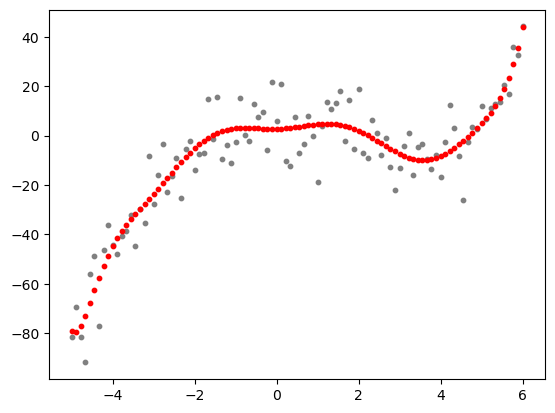

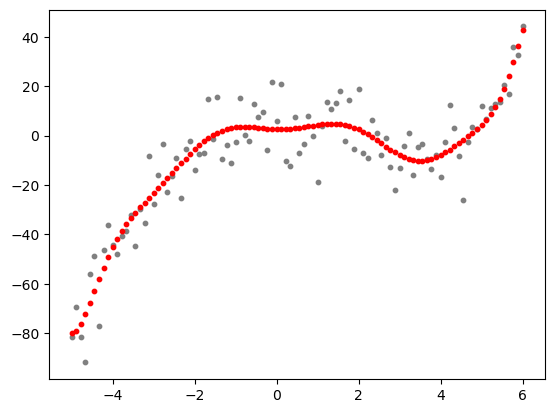

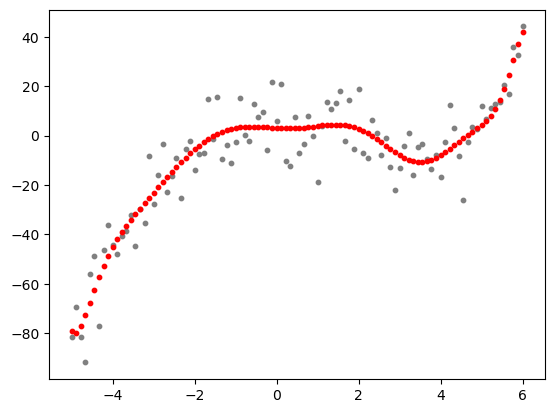

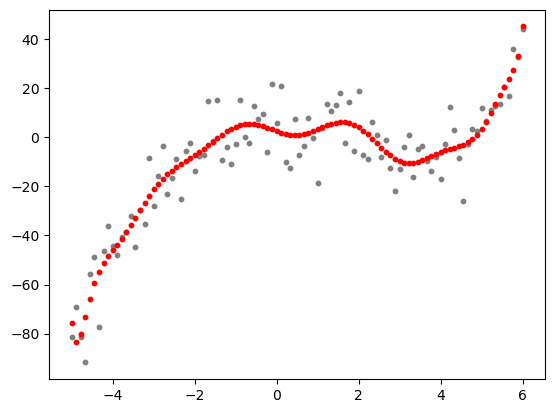

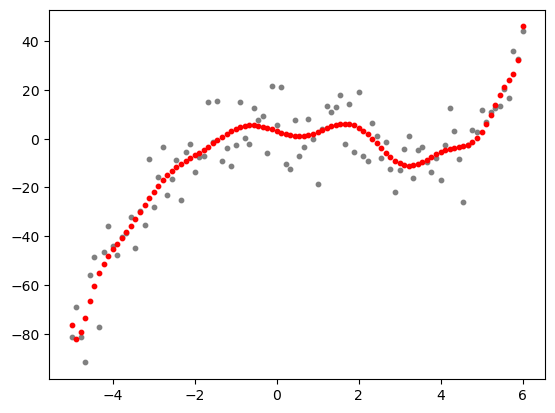

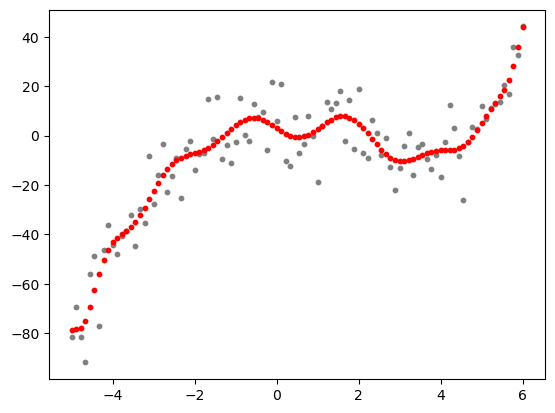

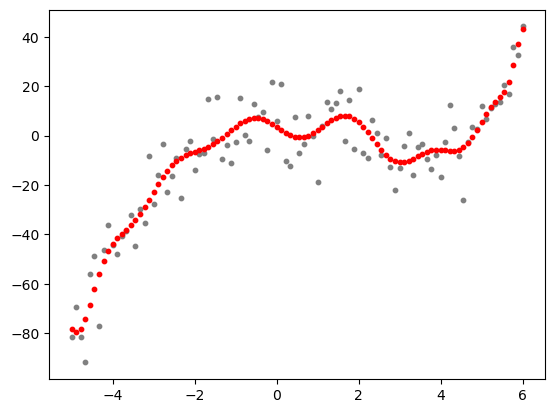

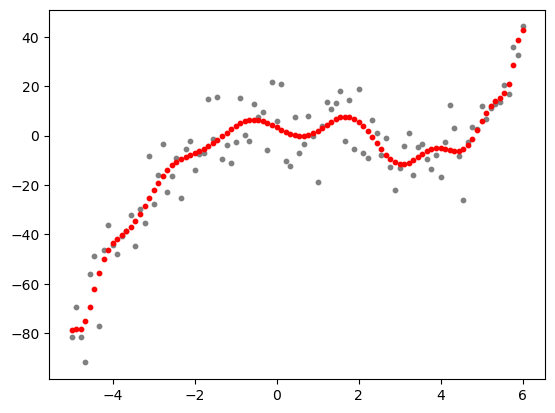

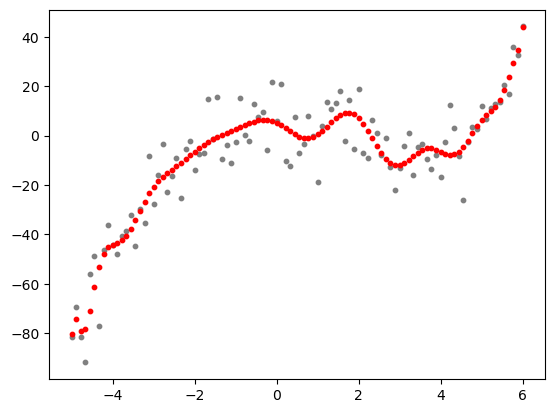

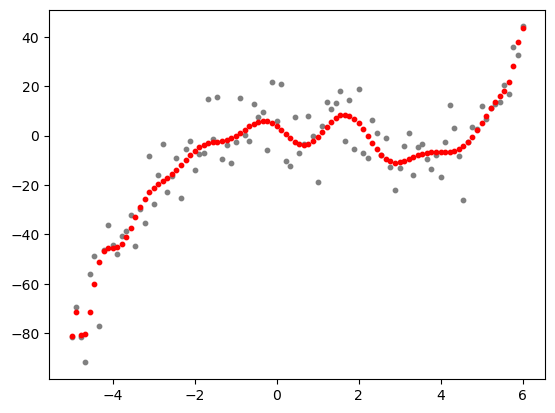

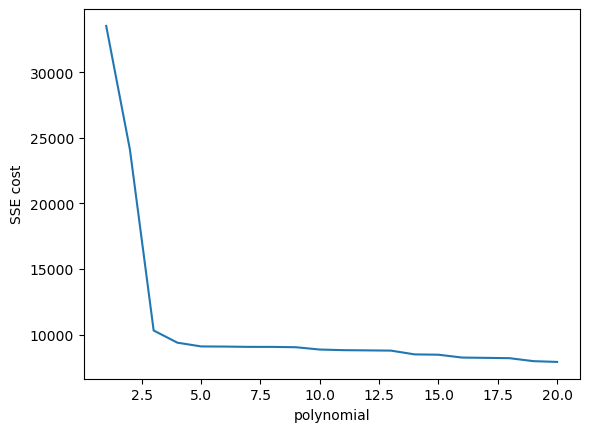

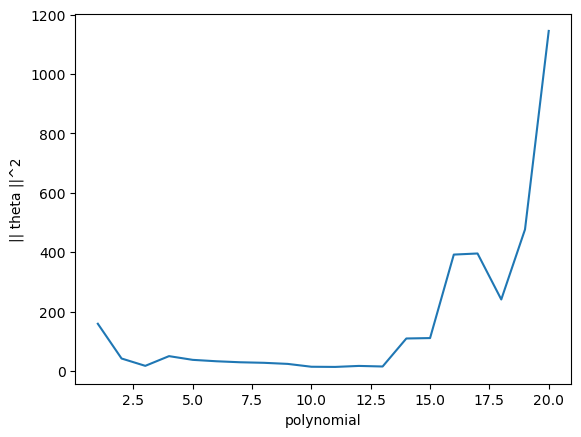

In [10]:
N,D = x.shape

#alpha = 1e1

sse = np.zeros(100)
sse[:] = np.nan

theta_norm2 = np.zeros(100)
theta_norm2[:] = np.nan

for D in range(1, 21):
    X = np.ones((N,1))
    for d in range(1, D + 1):
        X = np.hstack([X, x**d])

    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    y_pred = X.dot(theta)
    
    sse[D] = np.sum((y - y_pred)**2)     
    theta_norm2[D] = np.sum(theta**2)
    
    plt.figure()
    plt.scatter(x,y,s = 10, c = 'gray')
    plt.scatter(x,y_pred,s = 10, c = 'red')
    
plt.figure()
plt.plot(sse)
plt.xlabel('polynomial')
plt.ylabel('SSE cost')

plt.figure()
plt.plot(theta_norm2)
plt.ylabel('|| theta ||^2')
plt.xlabel('polynomial')

184.77156843890825
12.041959963598144
7.874429253845521
7833.523786827369
8001.740985133308
9233.945710341644


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.21274e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.653e+03, tolerance: 7.280e+00
  model = cd_fast.enet_coordinate_descent(


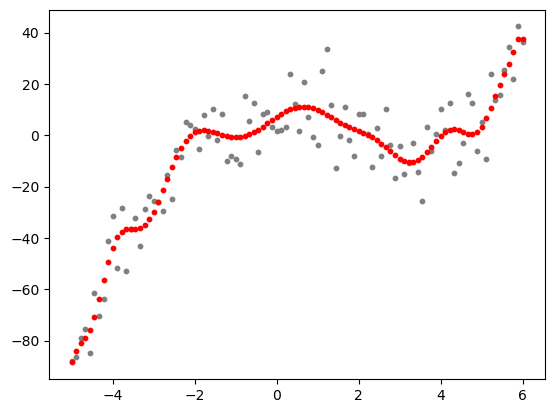

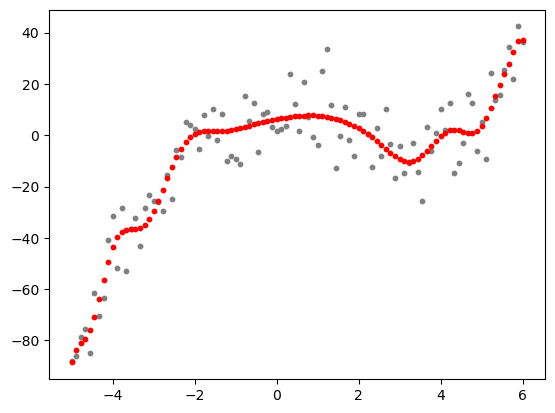

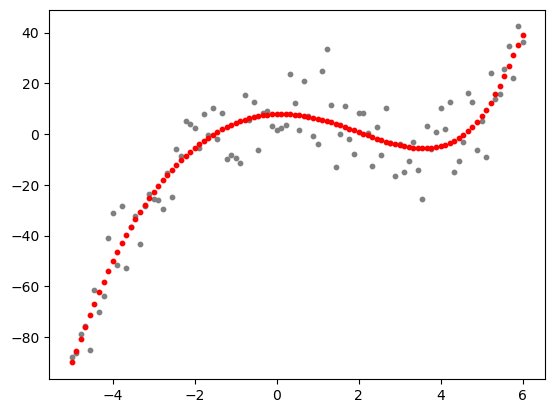

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

ridge_alpha = 1e1
lasso_alpha = 1e-1

linear = LinearRegression()
ridge = Ridge(alpha = ridge_alpha)
lasso = Lasso(alpha = lasso_alpha, max_iter = 1000)

X = np.ones((N,1))
for D in range(1,20):
    X = np.hstack([X, x**D])

linear.fit(X, y)
ridge.fit(X, y)
lasso.fit(X, y)

y_linear = linear.predict(X)
y_rigde = ridge.predict(X)
y_lasso = lasso.predict(X)
y_lasso = y_lasso.reshape(-1,1)

print(np.sum(linear.coef_ ** 2))
print(np.sum(ridge.coef_ ** 2))
print(np.sum(lasso.coef_ ** 2))

print(np.sum((y - y_linear)**2))
print(np.sum((y - y_rigde)**2))
print(np.sum((y - y_lasso)**2))

plt.figure()
plt.scatter(x,y,s = 10, c = 'gray')
plt.scatter(x,y_linear,s = 10, c = 'red')

plt.figure()
plt.scatter(x,y,s = 10, c = 'gray')
plt.scatter(x,y_rigde,s = 10, c = 'red')

plt.figure()
plt.scatter(x,y,s = 10, c = 'gray')
plt.scatter(x,y_lasso,s = 10, c = 'red')